# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV504"

In [40]:
LV_AXIS_THRESHOLD = None  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP055569, SRP059039, SRP060416, SRP032789, SRP028336, SRP006474, SRP057196, SRP033135, SRP050892, SRP059643, SRP058181, SRP056477, SRP015013, SRP039397, SRP042161, SRP066834, SRP013239, SRP007412, SRP027258, SRP007338, SRP007359, SRP027015, SRP005279, SRP045639, SRP051606, SRP050499, SRP002326, SRP064464, SRP041538, SRP034634, SRP056295, SRP013363, SRP037982, SRP048759, SRP065559, SRP011546, SRP056696, SRP057721, SRP007461, SRP003227, SRP041094, SRP058237, SRP032989, SRP009266, SRP042620, SRP012557, SRP058773, SRP043962, SRP002487, SRP017575, SRP025982, SRP049061, SRP058722, SRP033276, SRP063889, SRP029367, SRP052491, SRP030628, SRP006575, SRP017942, SRP056604, SRP045441, SRP019994, SRP040998, SRP057205, SRP014428, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (62 != 66)
  warnings.warn(


In [18]:
lv_data.shape

(9155, 124)

In [19]:
lv_data.head()

cell type  age group organisms  \
project   run                                                                 
SRP055569 SRR1821717  MCF10a human breast cancer cells  NaN   NaN       NaN   
          SRR1821716  MCF10a human breast cancer cells  NaN   NaN       NaN   
          SRR1821715  MCF10a human breast cancer cells  NaN   NaN       NaN   
          SRR1821714  MCF10a human breast cancer cells  NaN   NaN       NaN   
          SRR1821713  MCF10a human breast cancer cells  NaN   NaN       NaN   

                     severity tissue flowcell lane tonsil donor facs gating  \
project   run                                                                 
SRP055569 SRR1821717      NaN    NaN      NaN  NaN          NaN         NaN   
          SRR1821716      NaN    NaN      NaN  NaN          NaN         NaN   
          SRR1821715      NaN    NaN      NaN  NaN          NaN         NaN   
          SRR1821714      NaN    NaN      NaN  NaN          NaN         NaN   
          SRR1821713      NaN    NaN      NaN  NaN          NaN         NaN   

                      ... braak stage tissue origin passages sample group  \
project   run         ...                                                   
SRP055569 SRR1821717  ...         NaN           NaN      NaN          NaN   
          SRR1821716  ...         NaN           NaN      NaN          NaN   
          SRR1821715  ...         NaN           NaN      NaN          NaN   
          SRR1821714  ...         NaN           NaN      NaN          NaN   
          SRR1821713  ...         NaN           NaN      NaN          NaN   

                     subtypes  gfp cd13 ssea4 tra160     LV504  
project   run                                                   
SRP055569 SRR1821717      NaN  NaN  NaN   NaN    NaN  0.061339  
          SRR1821716      NaN  NaN  NaN   NaN    NaN -0.009518  
          SRR1821715      NaN  NaN  NaN   NaN    NaN  0.027694  
          SRR1821714      NaN  NaN  NaN   NaN    NaN  0.035006  
          SRR1821713      NaN  NaN  NaN   NaN    NaN  0.044853  

[5 rows x 124 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

cell type                                 0.021147
age (days)                                0.010961
mg/etoh treatment                         0.010029
protein                                   0.007877
clip variant                              0.007877
enzymatic digestion                       0.007877
dilutions of the malignant b-cell line    0.007381
infected construct                        0.004970
etoh/dox treatment                        0.004970
cycloheximide                             0.004424
replicates                                0.004321
read length                               0.003539
library type                              0.003539
tumor type                                0.003260
time point                                0.003008
age (years)                               0.002745
strain/background                         0.002745
sampling time                             0.002533
cytogenetic background                    0.002325
treatment time                 

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type    0.021147
tissue       0.000753
dtype: float64

In [23]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "tissue",
        LV_NAME,
    ],
]

In [24]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [25]:
_tmp_seq[0]

cell type  \
project   run                                                             
SRP055569 SRR2019079                  WI-38 human lung fibroblast cells   
          SRR2019138  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019228  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019200  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019066                  WI-38 human lung fibroblast cells   
          SRR2019086                  WI-38 human lung fibroblast cells   
SRP059039 SRR2049646                                                NaN   
SRP055569 SRR2019080                  WI-38 human lung fibroblast cells   
SRP060416 SRR2088156                       tonsil Innate lymphoid cells   
SRP032789 SRR1027188                                                NaN   
SRP055569 SRR1821426  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019113  mixture of U87 human glioma cells and WI-38 hu...   
SRP028336 SRR945249                                                 NaN   
SRP006474 SRR189780                                                 NaN   
SRP059039 SRR2049631                                                NaN   
SRP055569 SRR2019078                  WI-38 human lung fibroblast cells   
SRP028336 SRR945248                                                 NaN   
SRP057196 SRR1974999                                    fetal_quiescent   
SRP055569 SRR2019143  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821607  mixture of U87 human glioma cells and MCF10a h...   
SRP033135 SRR1033179             Human Skeletal Muscle Myoblasts (HSMM)   
SRP050892 SRR1696121                                                NaN   
SRP059643 SRR2069999                                                NaN   
SRP060416 SRR2088082                       tonsil Innate lymphoid cells   
SRP057196 SRR1974642                                            neurons   

                                 tissue     LV504  
project   run                                      
SRP055569 SRR2019079                NaN  9.169199  
          SRR2019138                NaN  0.884925  
          SRR2019228                NaN  0.522504  
          SRR2019200                NaN  0.520782  
          SRR2019066                NaN  0.379508  
          SRR2019086                NaN  0.360287  
SRP059039 SRR2049646        Whole blood  0.354006  
SRP055569 SRR2019080                NaN  0.332323  
SRP060416 SRR2088156                NaN  0.324137  
SRP032789 SRR1027188                NaN  0.317089  
SRP055569 SRR1821426                NaN  0.302607  
          SRR2019113                NaN  0.293245  
SRP028336 SRR945249   cerebellar cortex  0.293067  
SRP006474 SRR189780                 NaN  0.290564  
SRP059039 SRR2049631        Whole blood  0.279148  
SRP055569 SRR2019078                NaN  0.278391  
SRP028336 SRR945248   cerebellar cortex  0.277025  
SRP057196 SRR1974999             cortex  0.267074  
SRP055569 SRR2019143                NaN  0.262307  
          SRR1821607                NaN  0.245443  
SRP033135 SRR1033179                NaN  0.240693  
SRP050892 SRR1696121                NaN  0.229627  
SRP059643 SRR2069999                NaN  0.227782  
SRP060416 SRR2088082                NaN  0.220623  
SRP057196 SRR1974642             cortex  0.219027

In [26]:
# what is there in these projects?
lv_data.loc[["SRP055569"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

cell type  \
project   run                                                             
SRP055569 SRR2019079                  WI-38 human lung fibroblast cells   
          SRR2019138  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019228  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019200  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019066                  WI-38 human lung fibroblast cells   
          SRR2019086                  WI-38 human lung fibroblast cells   
          SRR2019080                  WI-38 human lung fibroblast cells   
          SRR1821426  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019113  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019078                  WI-38 human lung fibroblast cells   

                         LV504  
project   run                   
SRP055569 SRR2019079  9.169199  
          SRR2019138  0.884925  
          SRR2019228  0.522504  
          SRR2019200  0.520782  
          SRR2019066  0.379508  
          SRR2019086  0.360287  
          SRR2019080  0.332323  
          SRR1821426  0.302607  
          SRR2019113  0.293245  
          SRR2019078  0.278391

In [27]:
SELECTED_ATTRIBUTE = "cell type"

In [28]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [102]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [103]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [104]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [105]:
plot_data.head(20)

cell type  \
project   run                                                             
SRP055569 SRR2019079                  WI-38 human lung fibroblast cells   
          SRR2019138  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019228  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019200  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019066                  WI-38 human lung fibroblast cells   
          SRR2019086                  WI-38 human lung fibroblast cells   
SRP059039 SRR2049646                                        Whole blood   
SRP055569 SRR2019080                  WI-38 human lung fibroblast cells   
SRP060416 SRR2088156                       tonsil Innate lymphoid cells   
SRP032789 SRR1027188                                    NOT CATEGORIZED   
SRP055569 SRR1821426  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019113  mixture of U87 human glioma cells and WI-38 hu...   
SRP028336 SRR945249                                   cerebellar cortex   
SRP006474 SRR189780                                     NOT CATEGORIZED   
SRP059039 SRR2049631                                        Whole blood   
SRP055569 SRR2019078                  WI-38 human lung fibroblast cells   
SRP028336 SRR945248                                   cerebellar cortex   
SRP057196 SRR1974999                                    fetal_quiescent   
SRP055569 SRR2019143  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821607  mixture of U87 human glioma cells and MCF10a h...   

                         LV504  
project   run                   
SRP055569 SRR2019079  9.169199  
          SRR2019138  0.884925  
          SRR2019228  0.522504  
          SRR2019200  0.520782  
          SRR2019066  0.379508  
          SRR2019086  0.360287  
SRP059039 SRR2049646  0.354006  
SRP055569 SRR2019080  0.332323  
SRP060416 SRR2088156  0.324137  
SRP032789 SRR1027188  0.317089  
SRP055569 SRR1821426  0.302607  
          SRR2019113  0.293245  
SRP028336 SRR945249   0.293067  
SRP006474 SRR189780   0.290564  
SRP059039 SRR2049631  0.279148  
SRP055569 SRR2019078  0.278391  
SRP028336 SRR945248   0.277025  
SRP057196 SRR1974999  0.267074  
SRP055569 SRR2019143  0.262307  
          SRR1821607  0.245443

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [106]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # SRP057196
            "fetal_replicating": "Fetal neurons (replicating)",
            "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [107]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [108]:
_srp_code = "SRP059039"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" (Diarrhea {lv_data.loc[(_srp_code, x.name), 'severity']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [109]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [110]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [111]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [112]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [113]:
len(attr_order)

15

In [114]:
attr_order[:5]

['WI-38 human lung fibroblast cells',
 'Glioma + WI-38 lung fibroblast cells',
 'Whole blood (Diarrhea severe)',
 'tonsil Innate lymphoid cells',
 'NOT CATEGORIZED']

## Plot

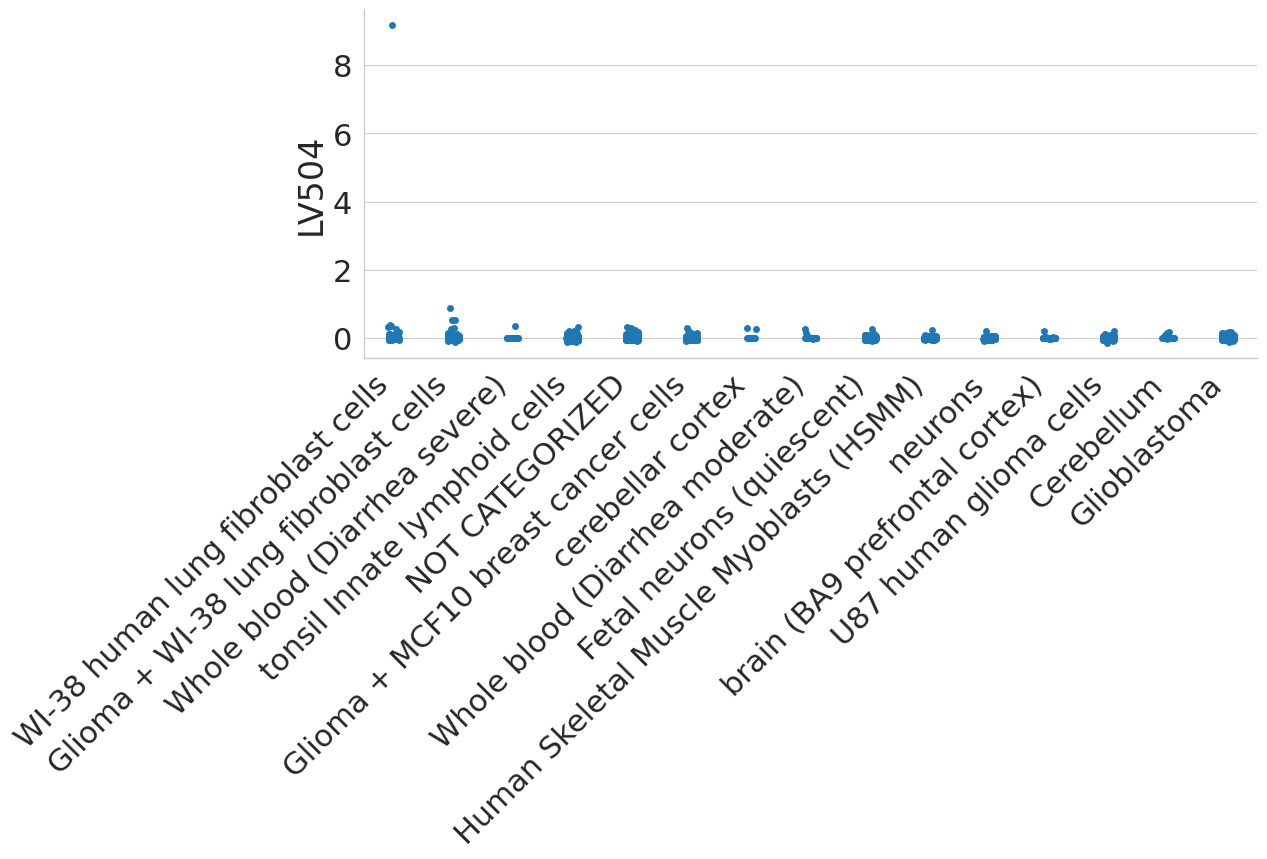

In [115]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [62]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [100]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("fetal_")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

cell type     LV504
project   run                                    
SRP057196 SRR1974999    fetal_quiescent  0.267074
          SRR1974950    fetal_quiescent  0.137609
          SRR1974984    fetal_quiescent  0.129084
          SRR1974974    fetal_quiescent  0.105929
          SRR1974954    fetal_quiescent  0.095452
          SRR1974946  fetal_replicating  0.094582
          SRR1974992    fetal_quiescent  0.090959
          SRR1974957    fetal_quiescent  0.089223
          SRR1974986    fetal_quiescent  0.087945
          SRR1974907    fetal_quiescent  0.084967
          SRR1974881  fetal_replicating  0.075454
          SRR1974969    fetal_quiescent  0.068064
          SRR1974896  fetal_replicating  0.061195
          SRR1974995    fetal_quiescent  0.060798
          SRR1974998    fetal_quiescent  0.058603
          SRR1974985    fetal_quiescent  0.055443
          SRR1974976    fetal_quiescent  0.051940
          SRR1974948    fetal_quiescent  0.050506
          SRR1974883  fetal_replicating  0.048377
          SRR1974892  fetal_replicating  0.047301

In [101]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP057196"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

cell type                 age       tissue  \
project   run                                                              
SRP057196 SRR1974999    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974642            neurons  postnatal 37 years       cortex   
          SRR1974950    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974984    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974768        endothelial  postnatal 63 years       cortex   
          SRR1974974    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974601             hybrid  postnatal 37 years       cortex   
          SRR1974954    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974653         astrocytes  postnatal 37 years       cortex   
          SRR1974946  fetal_replicating    prenatal 16-18 W       cortex   
          SRR1974992    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974957    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974986    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974695             hybrid  postnatal 50 years       cortex   
          SRR1974907    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974567             hybrid  postnatal 54 years       cortex   
          SRR1974669          microglia  postnatal 63 years       cortex   
          SRR1974549   oligodendrocytes  postnatal 54 years       cortex   
          SRR1974881  fetal_replicating    prenatal 16-18 W       cortex   
          SRR1974658            neurons  postnatal 37 years       cortex   
          SRR1974810            neurons  postnatal 21 years       cortex   
          SRR1974668          microglia  postnatal 47 years       cortex   
          SRR1974969    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974545   oligodendrocytes  postnatal 54 years       cortex   
          SRR1974560             hybrid  postnatal 54 years       cortex   
          SRR1974681            neurons  postnatal 50 years       cortex   
          SRR1974619             hybrid  postnatal 37 years       cortex   
          SRR1974872            neurons  postnatal 47 years       cortex   
          SRR1974896  fetal_replicating    prenatal 16-18 W       cortex   
          SRR1974995    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974646            neurons  postnatal 37 years       cortex   
          SRR1974833             hybrid  postnatal 21 years       cortex   
          SRR1974998    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974868          microglia  postnatal 47 years       cortex   
          SRR1974688         astrocytes  postnatal 50 years       cortex   
          SRR1974775            neurons  postnatal 63 years       cortex   
          SRR1974985    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974568             hybrid  postnatal 54 years       cortex   
          SRR1974655            neurons  postnatal 37 years       cortex   
          SRR1974855             hybrid  postnatal 21 years       cortex   
          SRR1974707            neurons  postnatal 50 years       cortex   
          SRR1974976    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974809            neurons  postnatal 21 years       cortex   
          SRR1974948    fetal_quiescent    prenatal 16-18 W       cortex   
          SRR1974782            neurons  postnatal 63 years       cortex   
          SRR1974883  fetal_replicating    prenatal 16-18 W       cortex   
          SRR1974752            neurons  postnatal 50 years       cortex   
          SRR1974558             hybrid  postnatal 54 years       cortex   
          SRR1974892  fetal_replicating    prenatal 16-18 W       cortex   
          SRR1974830            neurons  postnatal 21 years       cortex   
          SRR1974804             hybrid  postnatal 21 years       cortex   
  

# Reduced plot

## Data stats

In [56]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

count    4870.000000
mean        0.025346
std         0.171533
min        -0.538284
25%        -0.031916
50%        -0.009127
75%         0.011598
max         2.573508
Name: LV948, dtype: float64

In [57]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

,count,mean,std,min,25%,50%,75%,max
cell type,,,,,,,,
tonsil Innate lymphoid cells (ILC3),307.0,0.535780,0.367815,-0.335836,0.288173,0.555164,0.735615,2.573508
leukocyte from blood of healthy individual,2.0,0.181373,0.142462,0.080637,0.131005,0.181373,0.231740,0.282108
tonsil Innate lymphoid cells (ILC2),137.0,0.051628,0.162622,-0.215102,-0.045281,0.029412,0.118502,1.160231
NG2-sorted cell from blood of melanoma patient,6.0,0.026764,0.026107,-0.006339,0.009608,0.024752,0.043513,0.063092
CD4+CD25highCD127low/- Treg cells,2.0,0.022694,0.199404,-0.118305,-0.047806,0.022694,0.093194,0.163694
fixed cell,14.0,0.009433,0.024067,-0.052212,0.006719,0.012474,0.019663,0.042677
tonsil Innate lymphoid cells (NK),74.0,0.035219,0.182637,-0.538284,-0.074985,0.011516,0.122757,0.704060
low passage primary melanoma cultures,16.0,0.009195,0.038140,-0.026581,-0.009493,0.004274,0.012703,0.141645
soft tissue sarcoma,45.0,0.013193,0.034046,-0.048424,-0.006108,0.003226,0.019832,0.138857


In [58]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

Index(['tonsil Innate lymphoid cells (ILC3)',
       'leukocyte from blood of healthy individual',
       'tonsil Innate lymphoid cells (ILC2)',
       'NG2-sorted cell from blood of melanoma patient',
       'CD4+CD25highCD127low/- Treg cells', 'fixed cell',
       'tonsil Innate lymphoid cells (NK)',
       'low passage primary melanoma cultures', 'soft tissue sarcoma',
       'Differentiated Glioma Cell Line'],
      dtype='object', name='cell type')

In [59]:
final_plot_data.shape

(4870, 2)

In [60]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [61]:
final_plot_data.shape

(606, 2)

## Set x-axis order

In [62]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [63]:
len(attr_order)

10

In [64]:
attr_order[:5]

['tonsil Innate lymphoid cells (ILC3)',
 'leukocyte from blood of healthy individual',
 'tonsil Innate lymphoid cells (ILC2)',
 'NG2-sorted cell from blood of melanoma patient',
 'CD4+CD25highCD127low/- Treg cells']

## Plot

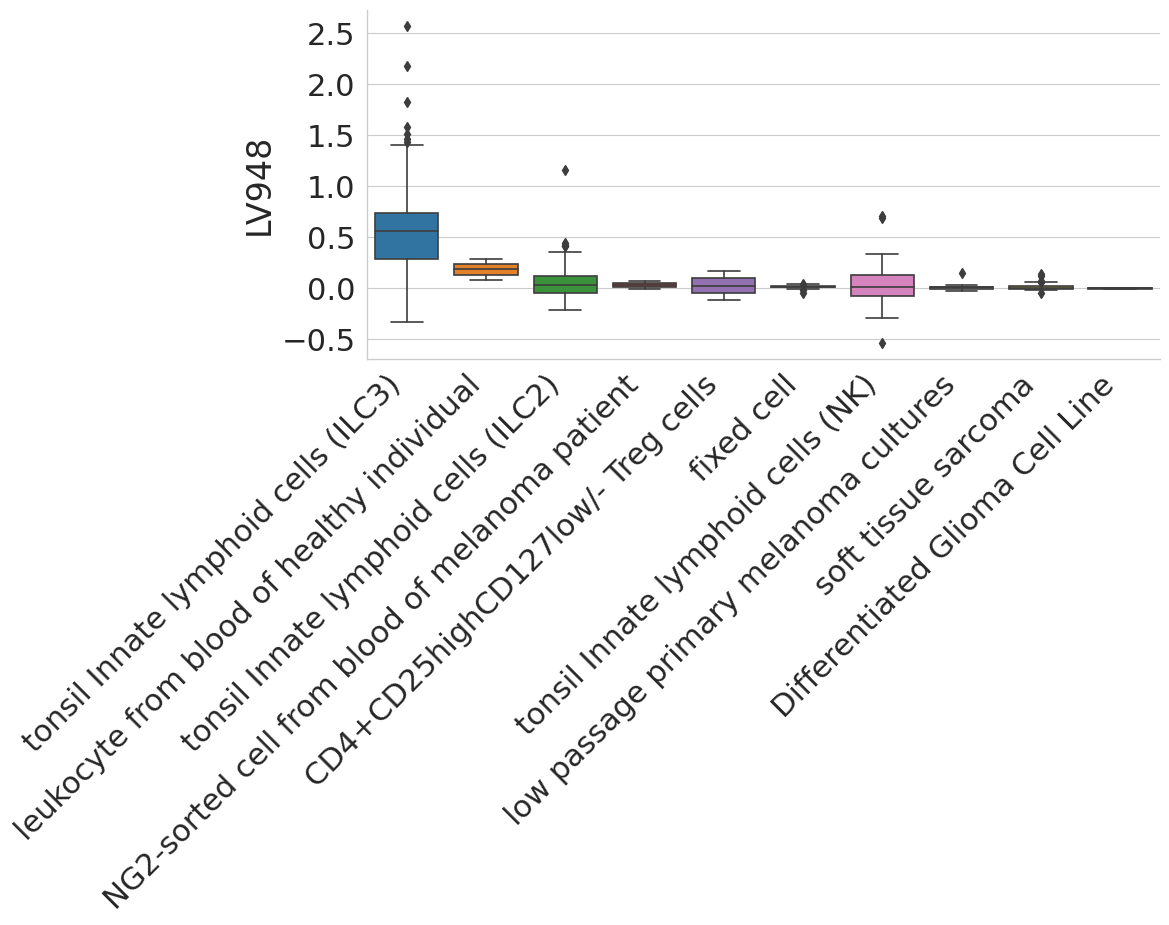

In [65]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )